# WORKSPACE PREPARATION

## Importing Library

In [64]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from pathlib import Path


import tensorflow as tf

import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras import layers
from keras import models
from tensorflow import keras
from keras import optimizers

## Load Dataset

In [65]:
# Set the path to your dataset
train_data_dir = "/documents/university/machine_learning/HW2_dataset/train"
test_data_dir = "/documents/university/machine_learning/HW2_dataset/test"

# Function to load and visualize a few images from each class
def visualize_dataset(dataset_dir, num_samples_per_class=3):
    classes = sorted(os.listdir(dataset_dir))
    print("Some sample images: ") 
    for class_name in classes:
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            print(f"Class: {class_name}")
            image_files = os.listdir(class_path)[:num_samples_per_class]
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                img = load_img(image_path)
                plt.imshow(img)
                plt.title(f'Class: {class_name}')
                plt.axis('off')
                plt.show()

def images_per_class(dataset_dir):
    classes = os.listdir(dataset_dir)
    print("The classes are:", classes)

    class_names = []
    num_images_list = []

    for class_name in classes:
        class_path = os.path.join(dataset_dir, class_name)
        # print(class_path)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            print(f"Class: {class_name}, Number of Images: {num_images}")

            class_names.append(class_name)
            num_images_list.append(num_images)

    # Plotting
    plt.bar(class_names, num_images_list)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.show()




In [66]:
# Number of images per class:
images_per_class(train_data_dir)
# Visualize a few images from the training set
#visualize_dataset(train_data_dir, num_samples_per_class=3)

The classes are: ['1', '4', '0', '2', '3']
Class: 1, Number of Images: 1500
Class: 4, Number of Images: 369
Class: 0, Number of Images: 1000
Class: 2, Number of Images: 1500
Class: 3, Number of Images: 2000


# NETWORK


In [67]:
from tensorflow.keras import models, layers
num_classes = 5
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Replace num_classes with the actual number of classes

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [68]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [69]:
#####-----Data Preprocessing-----######

from keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the target size and batch size
target_size = (150, 150)
batch_size = 20

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'categorical' if you have multiple classes
)

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='categorical'  # Change to 'categorical' if you have multiple classes
# )

# Check the shape of a batch of data
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break


Found 6369 images belonging to 5 classes.
Data batch shape: (20, 150, 150, 3)
Labels batch shape: (20, 5)


In [70]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # Number of batches per epoch
    epochs=30,            # Number of epochs
    # validation_data=validation_generator,
    # validation_steps=50   # Number of validation batches to be evaluated at the end of each epoch
)


Epoch 1/30


/tmp/ipykernel_722/1482004262.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 22s 213ms/step - loss: 1.3111 - accuracy: 0.4860
Epoch 2/30
100/100 [==============================] - 21s 205ms/step - loss: 1.1986 - accuracy: 0.5560
Epoch 3/30
100/100 [==============================] - 21s 213ms/step - loss: 1.1286 - accuracy: 0.5920
Epoch 4/30
100/100 [==============================] - 21s 207ms/step - loss: 1.1380 - accuracy: 0.5832
Epoch 5/30
100/100 [==============================] - 21s 207ms/step - loss: 1.0830 - accuracy: 0.5975
Epoch 6/30
100/100 [==============================] - 21s 213ms/step - loss: 1.0610 - accuracy: 0.6150
Epoch 7/30
100/100 [==============================] - 21s 211ms/step - loss: 1.0453 - accuracy: 0.6125
Epoch 8/30
100/100 [==============================] - 21s 214ms/step - loss: 1.0316 - accuracy: 0.6180
Epoch 9/30
100/100 [==============================] - 21s 210ms/step - loss: 1.0001 - accuracy: 0.6270
Epoch 10/30
100/100 [==============================] - 21s 211ms/step - loss: 0.9828

In [71]:
model.save('img_classification')

current_directory = os.getcwd()
model_path = os.path.join(current_directory, 'img_classification')
print("Model daved at: ", model_path)

INFO:tensorflow:Assets written to: img_classification/assets


INFO:tensorflow:Assets written to: img_classification/assets


Model daved at:  /src/img_classification


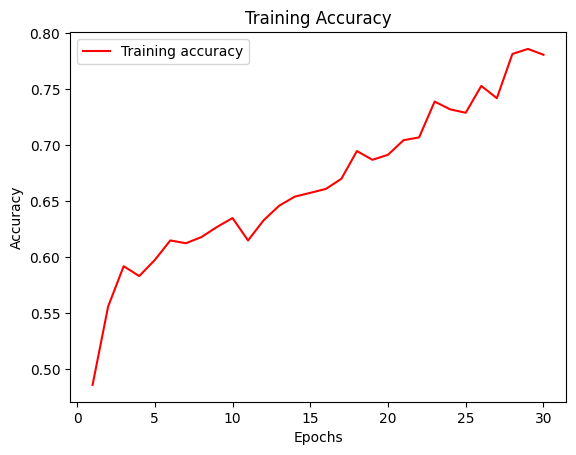

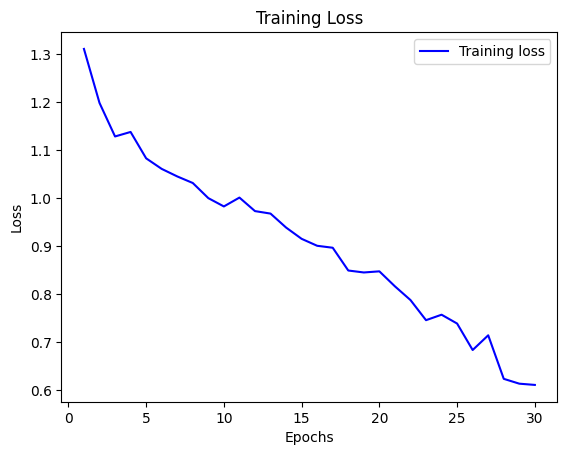

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline


# ... (Your code for data loading, model definition, and training)

# Extracting training accuracy, loss, and epochs from history
acc = history.history.get('accuracy', []) or history.history.get('acc', [])
loss = history.history.get('loss', [])
epochs = range(1, len(acc) + 1) if acc else []

if epochs:
    # Plotting training accuracy
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # Display the accuracy plot
    plt.show()

    # Plotting training loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # Display the loss plot
    plt.show()
else:
    print("No accuracy information in the training history.")





# RL Test


In [73]:
import sys
import numpy as np  # Add this line for numpy
import matplotlib
matplotlib.use('Agg')
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

try:
    import gymnasium as gym
except ModuleNotFoundError:
    print('gymnasium module not found. Try to install with')
    print('pip install gymnasium[box2d]')
    sys.exit(1)

def play(env, model):
    seed = 2020
    obs, _ = env.reset(seed=seed)

    # drop initial frames
    action0 = 0
    for i in range(50):
        obs, _, _, _, _ = env.step(action0)

    done = False
    while not done:
        # Preprocess the observation to match the input shape expected by the model
        processed_obs = preprocess_observation(obs)
        # Assuming the preprocess_observation function resizes the image to (150, 150, 3)

        # Expand dimensions to match the model's input shape
        processed_obs = np.expand_dims(processed_obs, axis=0)

        p = model.predict(processed_obs)  # adapt to your model
        action = np.argmax(p)  # adapt to your model
        obs, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        env.render()

    # Capture the last frame after rendering is complete
    img = env.render('rgb_array')

    # Close the environment after finishing
    env.close()

    # Display the last frame
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def preprocess_observation(obs):
    # Implement your preprocessing logic here, e.g., resizing the image
    processed_obs = tf.image.resize(obs, [150, 150])
    return processed_obs.numpy()

def resize_image(image):
    # Implement your image resizing logic (adjust as needed)
    resized_image = tf.image.resize(image, [150, 150])
    return resized_image.numpy()

env_arguments = {
    'domain_randomize': False,
    'continuous': False,
    'render_mode': 'human'
}

env_name = 'CarRacing-v2'
env = gym.make(env_name, **env_arguments)

print("Environment:", env_name)
print("Action space:", env.action_space)
print("Observation space:", env.observation_space)

# your trained
model_path = '/src/img_classification'  # your trained model
model = tf.keras.models.load_model(model_path)

play(env, model)




Environment: CarRacing-v2
Action space: Discrete(5)
Observation space: Box(0, 255, (96, 96, 3), uint8)
1/1 [==============================] - 0s 16ms/step


TypeError: render() takes 1 positional argument but 2 were given